# House Price Prediction 

## Imports

In [1]:
import pandas as pd
import numpy
import random
random.seed(4)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

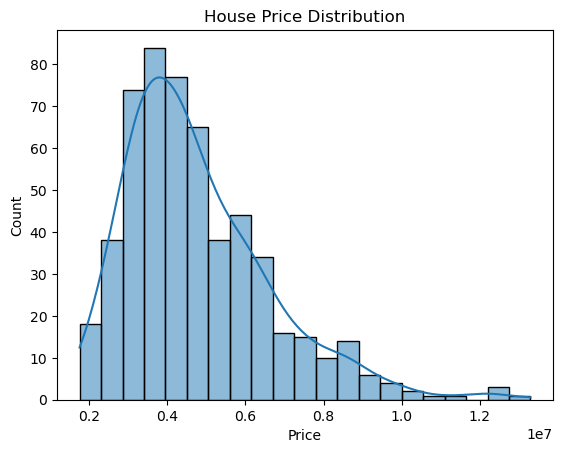

In [7]:
plt.figure
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.show()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

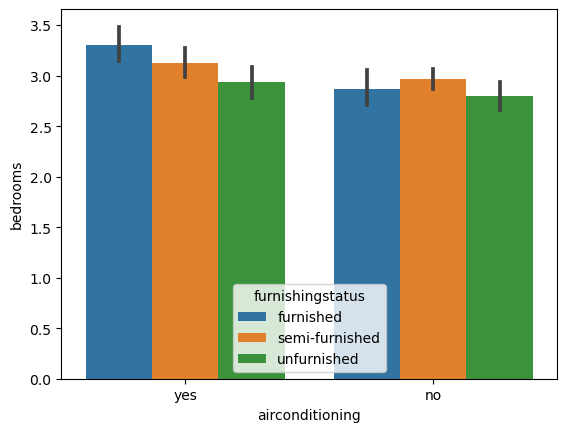

In [8]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

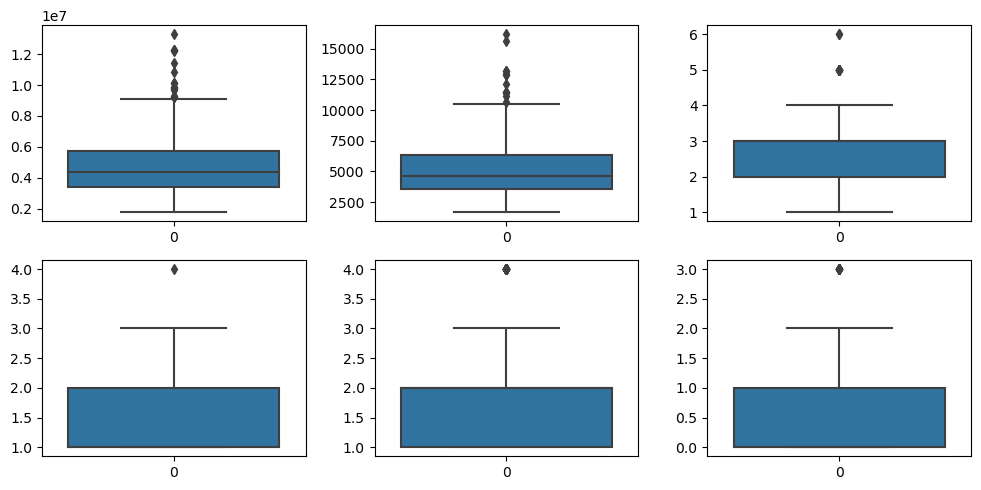

In [9]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

<Axes: xlabel='furnishingstatus', ylabel='price'>

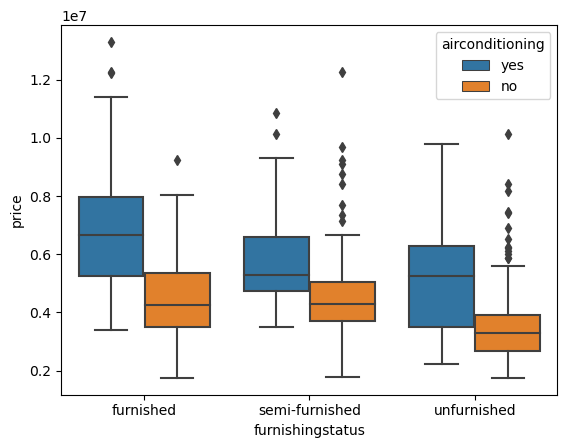

In [10]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='area', ylabel='price'>

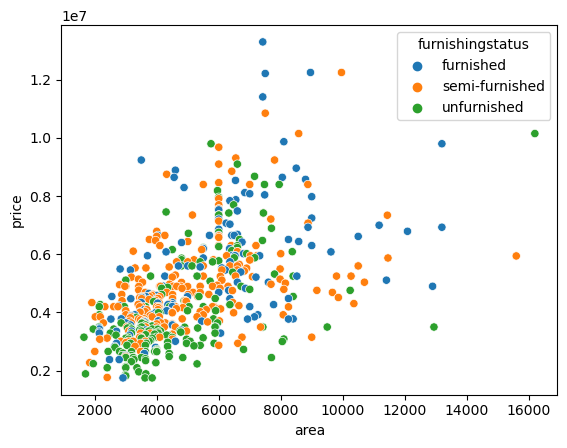

In [11]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

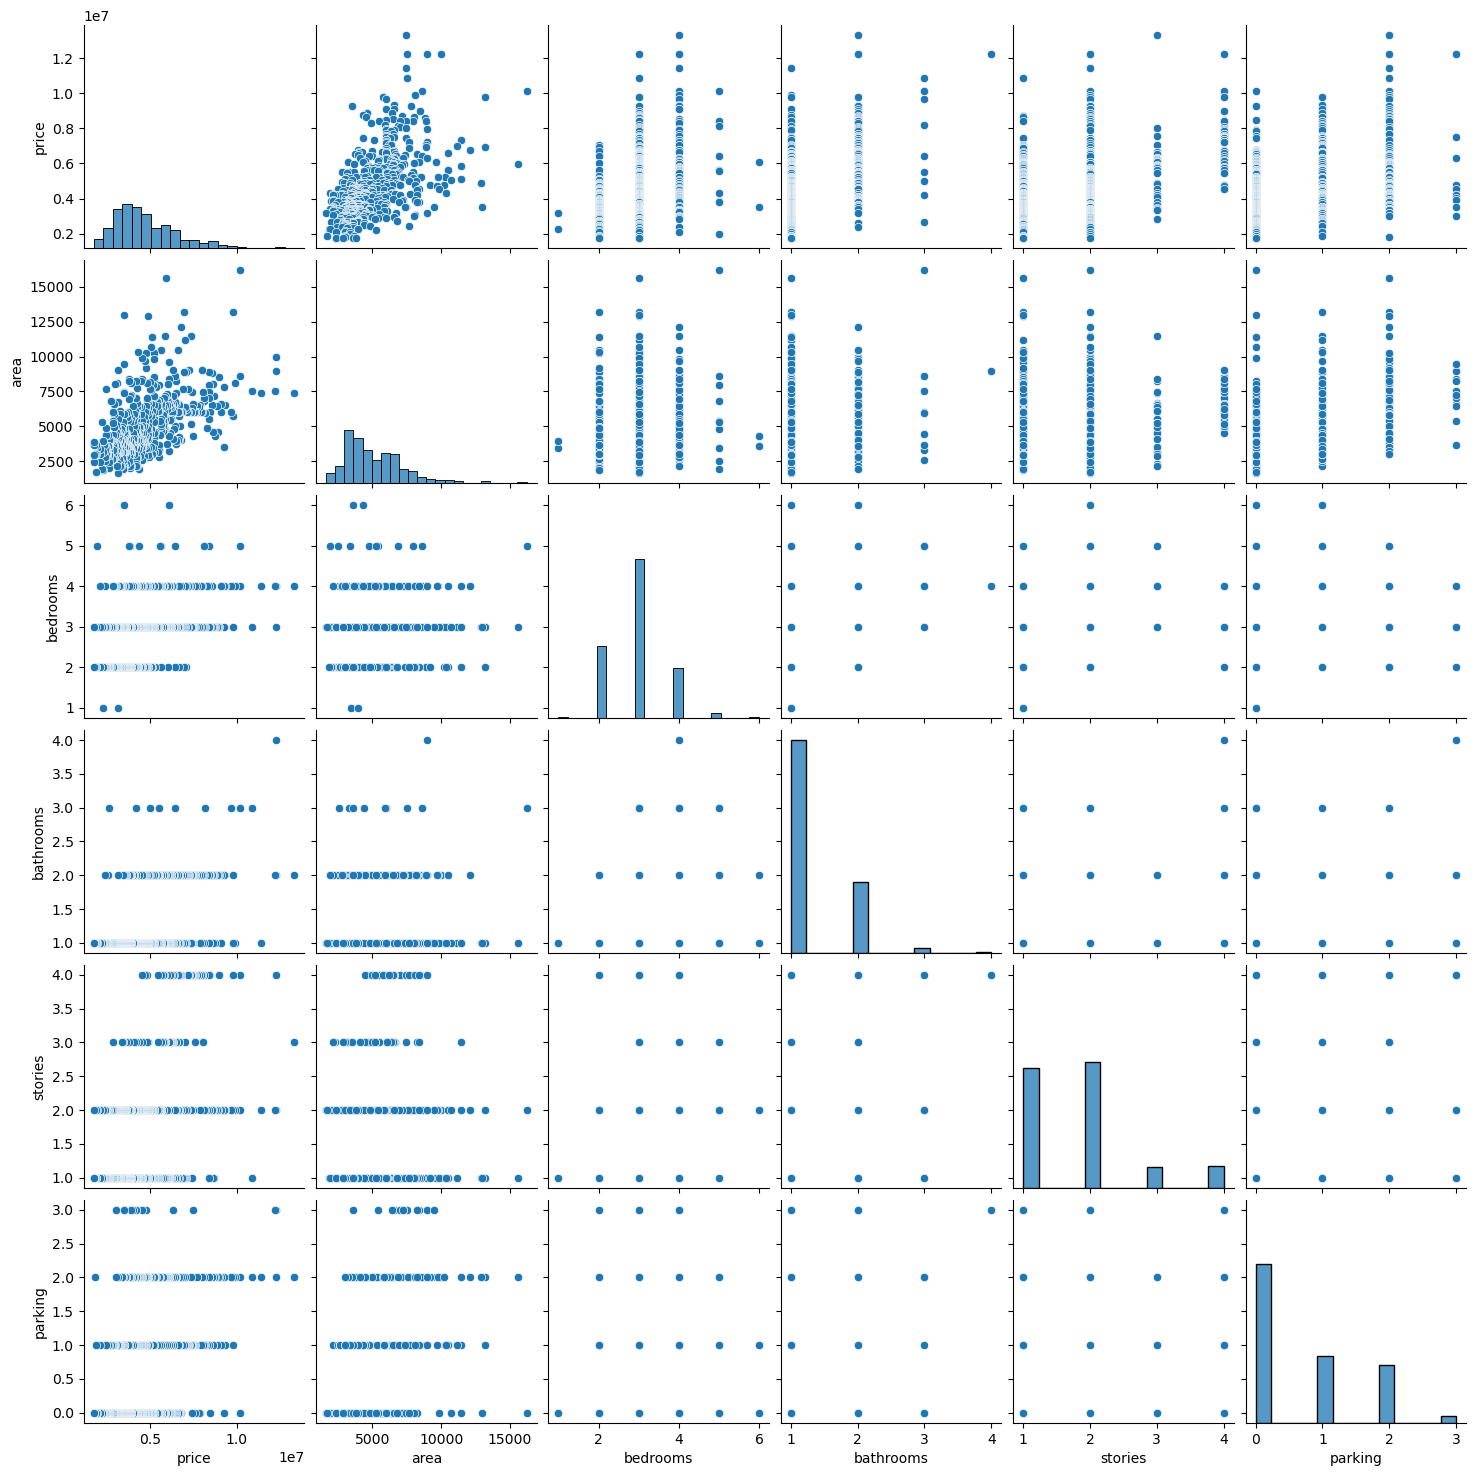

In [12]:
sns.pairplot(df)
plt.show()

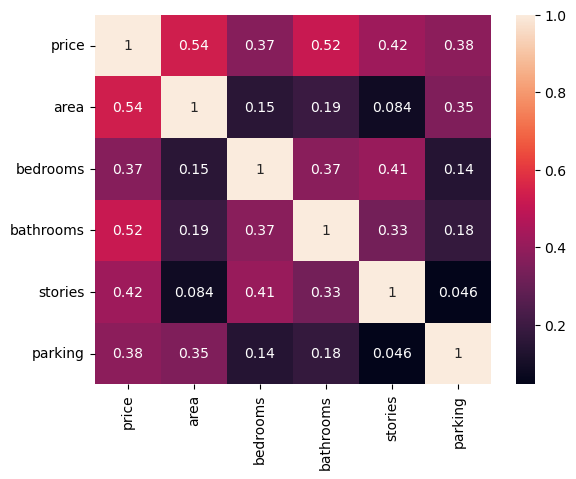

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [18]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

In [19]:
y=df['price']

## Training 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr= LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
coef=pd.DataFrame(lr.coef_,X.columns,columns=["Coefficient"])

In [26]:
coef

,Coefficient
area,2.660288e+02
bedrooms,1.068199e+05
bathrooms,9.504008e+05
stories,4.626757e+05
mainroad,4.081495e+05
guestroom,1.077280e+05
basement,4.069338e+05
hotwaterheating,1.045311e+06
airconditioning,8.207132e+05
parking,2.930211e+05


In [27]:
coef=pd.DataFrame(lr.coef_,X.columns,columns=["Coefficient"])

In [28]:
predictions=lr.predict(X_test)

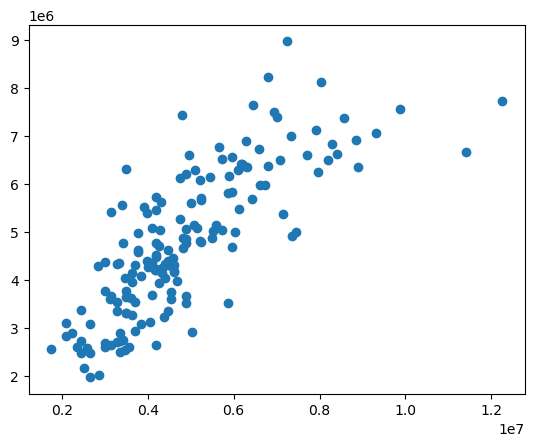

In [29]:
plt.scatter(y_test,predictions)

C:\Users\TANISHKA\AppData\Local\Temp\ipykernel_12888\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='price', ylabel='Density'>

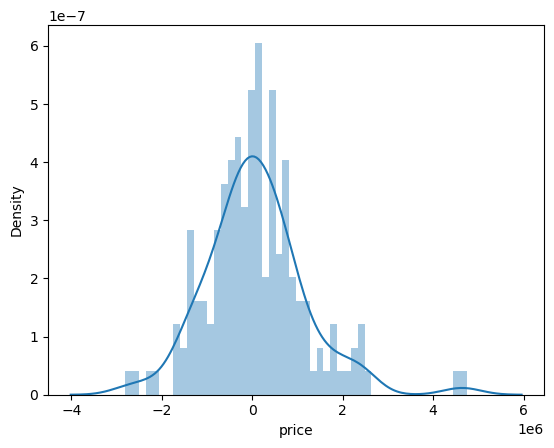

In [30]:
sns.distplot((y_test-predictions),bins=50)